In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scripts.result_parser import get_df
%matplotlib inline

In [2]:
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(context='notebook', style='darkgrid', font='serif')
sns.set_palette(flatui, n_colors=3)
#plt.style.use('seaborn-notebook')
params = {'font.family': 'serif',
          'legend.fontsize': 6,
          'legend.handlelength': 2,
          'figure.dpi': 300,
          'lines.markersize': 4,
          'axes.titlesize': 8,
          'axes.labelsize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8}
plt.rcParams.update(params)

> load results

In [3]:
direct_5PTI_df = get_df('runs/5PTI_convergence/direct/', formulation='direct', skip4=True)
juffer_5PTI_df = get_df('runs/5PTI_convergence/juffer/', formulation='juffer', skip4=True)

> Compute relative error with respect to the extrapolated solution.

In [4]:
def richardson_extrapolation(f1, f2, f3):
    return (f1*f3 - f2**2) / (f3 - 2*f2 + f1) 

In [5]:
e_solv = direct_5PTI_df['e_solv [kcal/Mol]'].values
e_solv_exact = richardson_extrapolation(*e_solv[-2:0:-1])
print('extrapolated solution using direct formulation: ', e_solv_exact)
rel_error_direct = np.abs((e_solv-e_solv_exact)/e_solv_exact)
e_solv = juffer_5PTI_df['e_solv [kcal/Mol]'].values
e_solv_exact = richardson_extrapolation(*e_solv[-2:0:-1])
print('extrapolated solution using Juffer formulation: ', e_solv_exact)
rel_error_juffer = np.abs((e_solv-e_solv_exact)/e_solv_exact)


extrapolated solution using direct formulation:  -313.59764676311323
extrapolated solution using Juffer formulation:  -312.6860107009303


## Mesh refinement study using 5PTI

Next, we tested our code on a realistic structure - bovine pancreatic trypsin inhibitor.
Similarly, we compute its solvation energy using 5 meshes with the element density ranging from 1 to 16 (Table ?).
Same fine parameters in Table ?, were used as the previous test, to reveal the discretization error.
Since an analytical solution is not available for this geometry, the reference values for error estimation come from Richardson extrapolation.

#### Table: Mesh size and element density of 5 meshes used in the grid refinement study on 5PTI .

| number of elements | element density (# elem / sq Angstrom) |
|:------------------:|:---------------:|
|        3032        |        1        |
|        6196        |        2        |
|        12512       |        4        |
|        25204       |        8        |
|        50596       |        16       |

Figure ? shows that the error of computing solvation energy of 5PTI converges linearly with respect to N, for both direct and Juffer's formulation.
Both convergence results confirm that bempp solves the mathematical model correctly.



#### Figure: Mesh convergence study of the solvation energy of bovine pancreatic trypsin inhibitor (PDB code 5PTI), using both direct formulation and Juffer's formulation. The error is with respect to the extrapolated solution using Richardson extrapolation.

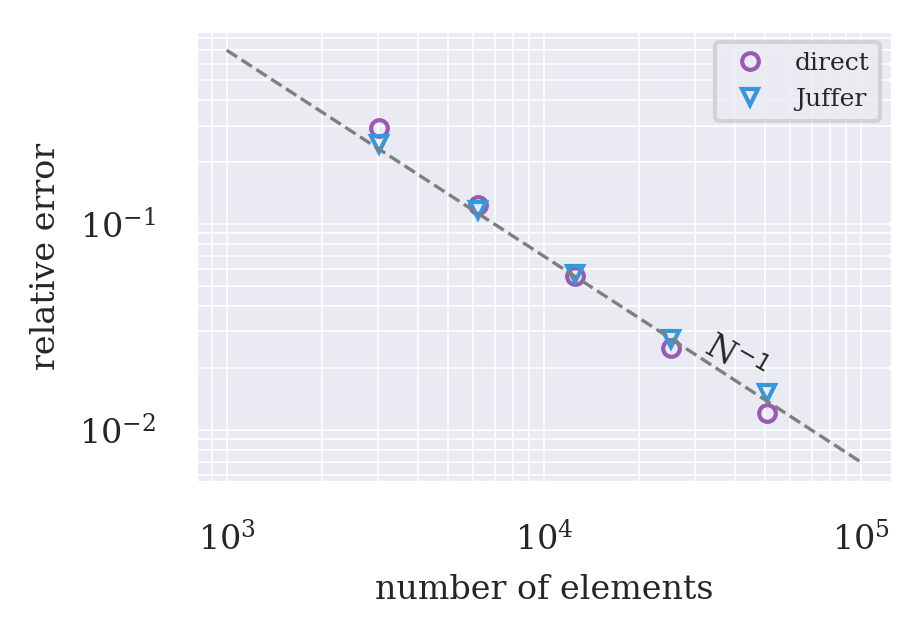

In [6]:
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(111)
N = direct_5PTI_df.index.values
N_ = np.array((1e3, 1e5))
asymp = N[2] * rel_error_direct[2] / N_
ax.loglog(N, rel_error_direct, linestyle='', marker='o', fillstyle='none', label='direct', ms=4)
ax.loglog(N, rel_error_juffer, linestyle='', marker='v', fillstyle='none', label='Juffer', ms=4)
ax.loglog(N_, asymp, linestyle='--', color='#7f7f7f', linewidth=0.8)
ax.grid(which="both", lw=0.4)
ax.set_xlabel('number of elements')
ax.set_ylabel('relative error')
ax.legend()

loc = (3*N[-2]+N[-1])/4
text_loc = np.array((loc, 1.2*N[-2]*rel_error_direct[-2]/loc))
ax.text(text_loc[0], text_loc[1],r'N$^{-1}$', fontsize=8, rotation=-30,rotation_mode='anchor');

-----
### Appendix

1. Richardson extrapolation using 3 meshes
$$
\begin{equation}
\bar{f}=\frac{f_{1} f_{3}-f_{2}^{2}}{f_{1}-2 f_{2}+f_{3}}
\end{equation}
$$

2. relative error in percentage

In [7]:
pd.DataFrame({'number of elements': direct_5PTI_df.index, 'relative error (%)': rel_error_direct*100}).set_index('number of elements')

,relative error (%)
number of elements,
3032,29.241691
6196,12.404705
12512,5.566163
25204,2.497614
50596,1.211727


In [8]:
pd.DataFrame({'number of elements': direct_5PTI_df.index, 'relative error (%)': rel_error_juffer*100}).set_index('number of elements')

,relative error (%)
number of elements,
3032,24.420178
6196,11.661042
12512,5.677942
25204,2.764678
50596,1.499253
